In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import tensorflow as tf

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math

/home/baxter_gps/.virtualenvs/robotics/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Parameters

In [5]:
NSAMPLE = 2500

In [6]:
from aml_dl.mdn.training.config import network_params_inv

In [7]:
from aml_dl.mdn.model.mdn_push_inv_model import MDNPushInverseModel

In [8]:
from aml_data_collec_utils.core.data_manager import DataManager

/home/baxter_gps/catkin_workspaces/baxter_ws/src/aml_data/aml_dl/baxter_push_data/


In [9]:
sess = tf.InteractiveSession()

In [10]:
network_params_inv['dim_input'] = 14
network_params_inv['dim_output'] = 2
network_params_inv['k_mixtures'] = 24

inverse_model = MDNPushInverseModel(sess=sess, network_params=network_params_inv)
inverse_model.init_model()

In [10]:
x_curr   = np.random.randn(1,7).tolist()[0]
x_tgt    = np.random.randn(1,7).tolist()[0]
u_action = np.random.random((1,2))

In [11]:
input_x = np.expand_dims(np.r_[x_curr, x_tgt], 0)

x_test = np.float32(np.random.uniform(-5.5, 5.5, (10,14)))

mus = inverse_model.run_op('mu', x_test)
sigma = inverse_model.run_op('sigma', x_test)
pis = inverse_model.run_op('pi', x_test)
# loss = inverse_model._mdn.run_op(sess,'loss', xs = x_test, ys = u_action)[0]

print "MUS: ", mus.shape
print "SIGMA: ", sigma.shape
print "PIs:", pis.shape
# print "LOSS:", loss
#theta = inverse_model.sample_out_max_pi(input_x, 1)[0]
    
pi_ids = inverse_model._max_pi_idx(pis)
print pi_ids
action = mus[0,:, pi_ids]
print action

NameError: name 'inverse_model' is not defined

In [12]:
network_params_inv['dim_input'] = 14
network_params_inv['dim_output'] = 2
network_params_inv['k_mixtures'] = 24
network_params_inv['write_summary'] = False
network_params_inv['load_saved_model'] = False

inverse_model = MDNPushInverseModel(sess=sess, network_params=network_params_inv)
inverse_model.init_model()

AttributeError: 'MixtureDensityNetwork' object has no attribute '_optimiser'

In [11]:
data_file_indices = network_params_inv['train_file_indices']

data_man = DataManager(data_folder_path=network_params_inv['training_data_dir'], data_name_prefix='test_push_data')

In [12]:
ids=range(0,5)
from aml_dl.mdn.utilities.get_data_from_files import get_data_from_files

data_file_indices = network_params_inv['train_file_indices']


data_x, data_y = get_data_from_files(data_file_range=data_file_indices, model_type='inv')

print data_x[0]
print "Data y"
print data_y[0]

[ 0.77720837  0.00968411 -0.10059532  0.48422096  0.50864236 -0.4998951
 -0.50687071  0.75349972  0.07546175 -0.09852677  0.57424104  0.5904789
 -0.39952925 -0.4024404 ]
Data y
[ 0.          0.00341609]


In [13]:
# data_y

In [14]:
xs = data_x#np.random.uniform(-10.5, 10.5, (14, NSAMPLE)).T
ys = np.array(data_y)#np.random.uniform(-10.5, 10.5, (2, NSAMPLE)).T

In [15]:
ys.shape

(1890, 2)

In [16]:
sess.run(tf.global_variables_initializer())

NEPOCH = 10000
loss = inverse_model.train(x_data = xs, y_data = ys, epochs =  NEPOCH)

In [17]:
print loss

[ nan  nan  nan ...,  nan  nan  nan]


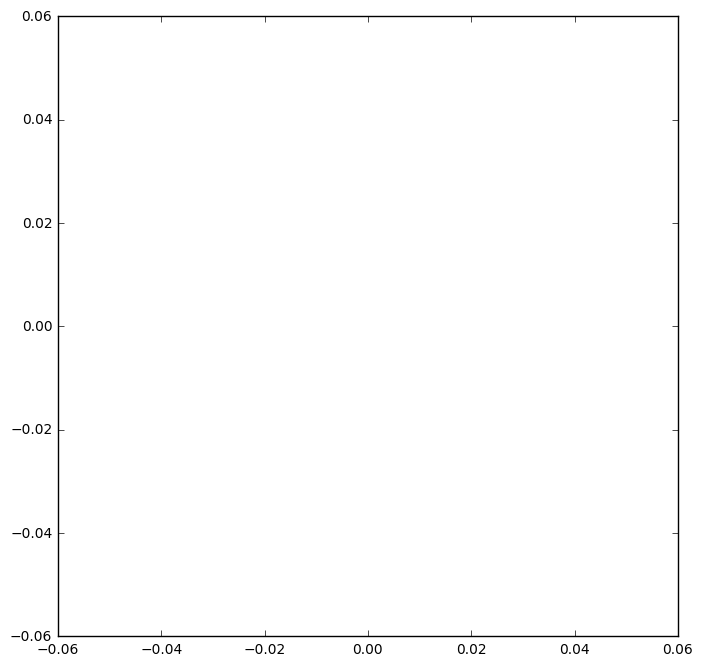

In [18]:
plt.figure(figsize=(8, 8))
plt.plot(np.arange(100, NEPOCH,1), loss[100:], 'r-')
plt.show()

In [21]:
# from aml_dl.mdn.model.tf_mdn_model import MixtureOfGaussians

In [16]:
out_pi = inverse_model._net_ops['pi']
out_sigma = inverse_model._net_ops['sigma']
out_mu = inverse_model._net_ops['mu']
x = inverse_model._net_ops['x']

In [24]:
# mixture = MixtureOfGaussians()

In [14]:
x_test = np.random.uniform(-10.5, 10.5, (14, NSAMPLE)).T
NTEST = x_test.size
# ids


In [17]:
out_pi_test, out_sigma_test, out_mu_test = sess.run([out_pi, out_sigma, out_mu], feed_dict={x: x_test})

In [19]:

print out_pi_test.shape, x_test.shape, out_sigma_test.shape, out_mu_test.shape


(2500, 24) (2500, 14) (2500, 24) (2500, 2, 24)


In [ ]:
# print out_mu_test.reshape((300,2))

In [20]:
samples = inverse_model._generate_mixture_samples(out_pi_test,out_mu_test,out_sigma_test)

In [22]:
print samples.shape

(2500, 2, 10)


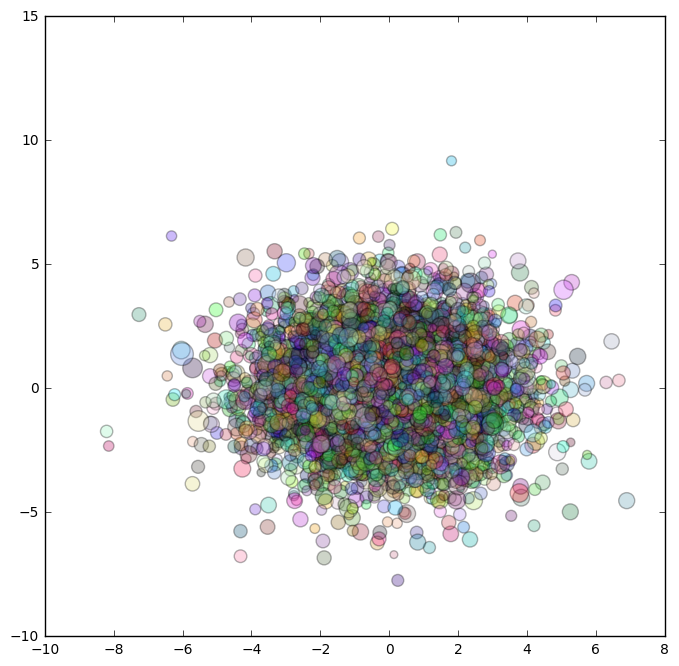

In [34]:
plt.figure(figsize=(8, 8))
plt.scatter(samples[:,0,:],samples[:,1,:],s=out_sigma_test[:,1]*100, c=np.random.rand(2500,3), alpha=0.3)
plt.show()

In [ ]:


y_test = mixture.generate_mixture_samples(out_pi_test, out_mu_test, out_sigma_test,100)

plt.figure(figsize=(8, 8))
plt.plot(x_data,y_data,'ro', x_test,y_test,'bo',alpha=0.3)
plt.show()